# To create a function for simulating the CPU utilization model for Rasp Pi in packet forwarding
- in wireless ad-hoc mode
- parameter x is the traffic at TX and RX of rasp pi in a unit of bps

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid function
- f(x) = 1/(exp(-c1*(x -c2)))

In [1]:
def sigmoid(x,c1,c2):
    
    ## if x > 0
    x = x*1e-6 # To convert the unit of x from bps to Mbps
  
    z = np.exp(-c1*(x-c2))
    sig = 1 / (1 + z)

    return sig

## Modified Sigmoid function

In [2]:
def modify_sigmoid(x,c1,c2,thr,m,c):
    """
    input: x : traffic load
            c1 : sigmoid constant#1
            c2 : sigmoid constant#2
            thr : linear thr
            m = slop of linear funciton
            c = const of liner funciton 
            
    """
    ## if x < 5 : Linear function
    ## if x >= 5: Sigmoid
    x = x*1e-6 # To convert the unit of x from bps to Mbps

    z2 = np.exp(-c1*(x-c2))
    sig = 1 / (1 + z2)
    z1 = m*x + c

    sig = np.where(x < thr, z1, sig)
    return sig

In [4]:
c1 = 2
c2 = 2
x = np.arange(start=0, stop=7, step=0.001)*1e6 ## example of x
f = sigmoid(x,c1,c2)

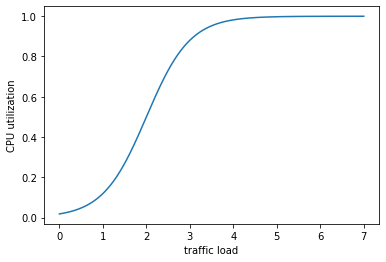

In [5]:
plt.plot(x,f)
plt.ylabel('CPU utilization')
plt.xlabel('traffic load')
plt.show()

In [6]:
print(f)

[0.01798621 0.01802157 0.018057   ... 0.99995433 0.99995442 0.99995451]


### Example 2

In [7]:
c1 = 1
c2 = 4
x = np.arange(start=0, stop=7, step=0.001)
f = sigmoid(x,c1,c2)

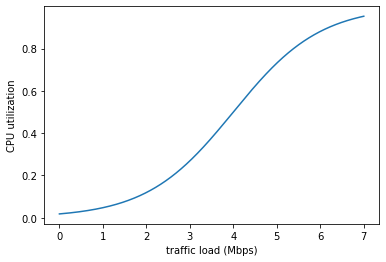

In [8]:
plt.plot(x,f)
plt.ylabel('CPU utilization')
plt.xlabel('traffic load (Mbps)')
plt.show()

In [9]:
print(f)

[0.01798621 0.01800388 0.01802157 ... 0.95243841 0.95248369 0.95252893]


## Example 3

In [10]:
c1 = 1.2
c2 = 4.5
x = np.arange(start=0, stop=7, step=0.001)
f = sigmoid(x,c1,c2)

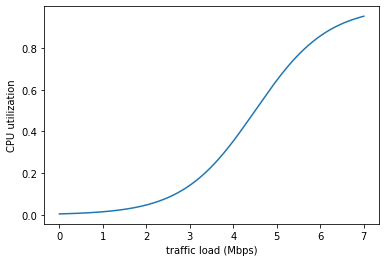

In [11]:
plt.plot(x,f)
plt.ylabel('CPU utilization')
plt.xlabel('traffic load (Mbps)')
plt.show()

In [12]:
print(f)

[0.00449627 0.00450165 0.00450703 ... 0.95241123 0.95246558 0.95251989]


## Example 4

In [32]:
c1 = 2
c2 = 2
x = np.arange(start=0, stop=7, step=0.001)
m = 0.2 
c = 0.001
thr = 5

f = modify_sigmoid(x,c1,c2,thr,m,c)

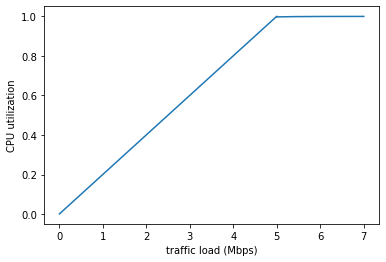

In [33]:
plt.plot(x,f)
plt.ylabel('CPU utilization')
plt.xlabel('traffic load (Mbps)')
plt.show()

In [15]:
print('x =', x)
print('f =',f)

x = [0.000e+00 1.000e-03 2.000e-03 ... 6.997e+00 6.998e+00 6.999e+00]
f = [0.01       0.0101     0.0102     ... 0.99995433 0.99995442 0.99995451]
